<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Copy_of_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [1]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=38.69323106073592, pvalue=3.961609200867749e-09)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## T-test Assumptions

<https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php>

- Independence of means

Are the means of our voting data independent (do not affect the outcome of one another)?
  
The best way to increase thel likelihood of our means being independent is to randomly sample (which we did not do).


In [0]:
from scipy.stats import ttest_ind

?ttest_ind

- "Homogeneity" of Variance? 

Is the magnitude of the variance between the two roughly the same?

I think we're OK on this one for the voting data, although it probably could be better, one party was larger than the other.

If we suspect this to be a problem then we can use Welch's T-test

In [0]:
?ttest_ind

- "Dependent Variable" (sample means) are Distributed Normally

<https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50>

Lots of statistical tests depend on normal distributions. We can test for normality using Scipy as was shown above.

This assumption is often assumed even if the assumption is a weak one. If you strongly suspect that things are not normally distributed, you can transform your data to get it looking more normal and then run your test. This problem typically goes away for large sample sizes (yay Central Limit Theorem) and is often why you don't hear it brought up. People declare the assumption to be satisfied either way. 



## Central Limit Theorem



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_means = []
for x in range(0,3000):
  coinflips = np.random.binomial(n=1, p=.5, size=12)
  one_sample = coinflips
  sample_means.append(coinflips.mean())

print(len(sample_means))
print(sample_means)

3000
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5833333333333334, 0.75, 0.6666666666666666, 0.4166666666666667, 0.5, 0.75, 0.4166666666666667, 0.3333333333333333, 0.6666666666666666, 0.5833333333333334, 0.5833333333333334, 0.5, 0.3333333333333333, 0.6666666666666666, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.6666666666666666, 0.4166666666666667, 0.4166666666666667, 0.5833333333333334, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5833333333333334, 0.5833333333333334, 0.8333333333333334, 0.5833333333333334, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.5, 0.5833333333333334, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667, 0.3333333333333333, 0.25, 0.6666666666666666, 0.5833333333333334, 0.5833333333333334, 0.6666666666666666, 0.5833333333333334, 0.3333333333333333, 0.75, 0.6666666666666666, 0.5, 0.5833333333333334, 0.4166666666666667, 0.4166666666666667, 0.333333333333

In [5]:
df = pd.DataFrame({'a': one_sample})
df.head()

,a
0,1
1,0
2,0
3,0
4,1


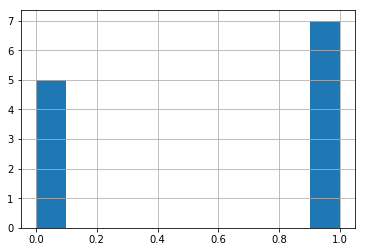

In [6]:
df.a.hist()

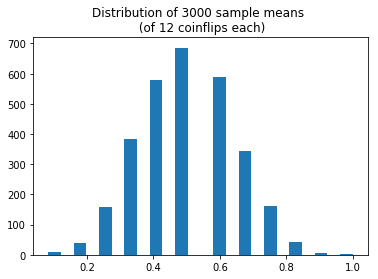

In [7]:
ax = plt.hist(sample_means, bins=24)
plt.title('Distribution of 3000 sample means \n (of 12 coinflips each)');

What does the Central Limit Theorem State? That no matter the initial distribution of the population, the distribution of sample means taken will approximate a normal distribution as $n \rightarrow \infty$.

This has very important implications for hypothesis testing and is precisely the reason why the t-distribution begins to approximate the normal distribution as our sample size increases. 

## Standard Error of the Mean

What does it mean to "estimate"? the Population mean?

## Build and Interpret a Confidence Interval

<img src="https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/Confidence_Interval.png?raw=true" width=400>

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

## Graphically Represent a Confidence Interval

## Relationship between Confidence Intervals and T-tests

Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [9]:
import numpy as np

coinflip_means = []
for x in range(0,100):
  coinflips = np.random.binomial(n=1, p=.5, size=30)
  coinflip_means.append(coinflips.mean())

print(coinflip_means)

[0.43333333333333335, 0.6333333333333333, 0.6, 0.43333333333333335, 0.43333333333333335, 0.4666666666666667, 0.6333333333333333, 0.5333333333333333, 0.5666666666666667, 0.43333333333333335, 0.5666666666666667, 0.3333333333333333, 0.26666666666666666, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.6333333333333333, 0.5, 0.5, 0.5, 0.4, 0.5, 0.4, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.6333333333333333, 0.4666666666666667, 0.4, 0.6, 0.5333333333333333, 0.5666666666666667, 0.3, 0.5, 0.43333333333333335, 0.4666666666666667, 0.6333333333333333, 0.6333333333333333, 0.5, 0.43333333333333335, 0.6333333333333333, 0.5, 0.4666666666666667, 0.36666666666666664, 0.4, 0.5, 0.6, 0.5666666666666667, 0.7, 0.4, 0.6, 0.5, 0.6333333333333333, 0.5333333333333333, 0.5, 0.43333333333333335, 0.36666666666666664, 0.4666666666666667, 0.7, 0.4, 0.5666666666666667, 0.5333333333333333, 0.36666666666666664, 0.5333333333333333, 0.4666666666666667, 0.6, 0.466666

In [10]:
# Sample Size
n = len(coinflip_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(coinflip_means)
# Sample Standard Deviation
sample_std = np.std(coinflip_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.47652239164446597, 0.5154776083555339)


In [11]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.47652239164446597, 0.5154776083555339)


A null hypothesis that's just inside of our confidence interval == fail to reject



In [0]:
ttest_1samp(coinflip_means, .49)

Ttest_1sampResult(statistic=1.0958141381351718, pvalue=0.2758187277462794)

A null hypothesis that's just outside of our confidence interval == reject



In [0]:
ttest_1samp(coinflip_means, .4818927)

Ttest_1sampResult(statistic=1.9842235343454973, pvalue=0.04999925456754134)

## Run a $\chi^{2}$ Test "by hand" (Using Numpy)

## Run a $\chi^{2}$ Test using Scipy

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
import scipy.stats as stats

In [0]:
# List of column names
col_names = ['party', 'handicapped-infants', 'water-project', 'budget',
             'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
             'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
             'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 'south-africa']

In [58]:
# Read in and clean up our data
df = pd.read_csv('/content/house-votes-84 (1).data', names=col_names, na_values = '?')

df.replace({'y': 1, 'n': 0}, inplace=True)

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Split data
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [37]:
### TEST RUN THROUGH THE FUNCTIONS

# Calculate standard deviation
std_dev = np.std(df['religious-groups'])

# length of column i.e. observations
n = len(df['religious-groups'])

# Standard Error of our data
std_err = stats.sem(df['religious-groups'], nan_policy='omit')

# Calculate t-statistic for 95% CI
t = stats.t.ppf(.975, n-1)

# Mean of our observations
relgroup_mean = df['religious-groups'].mean()


# Calculate confidence interval
conf_int = (relgroup_mean - t*std_err, relgroup_mean + t*std_err)

# Just the margin of error
moe = t*std_err


# Print stuff
print('Standard Deviation: ', std_dev)
print('Degrees of Freedom: ', n-1)
print('T-statistic for 95% CI: ', t)
print('Mean vote: ', relgroup_mean)
print('Margin of error: ', moe)
print('Confidence Interval: ', conf_int)

Standard Deviation:  0.47955717083542665
Degrees of Freedom:  434
T-statistic for 95% CI:  1.9654450635078535
Mean vote:  0.6415094339622641
Margin of error:  0.0458280222204284
Confidence Interval:  (0.5956814117418358, 0.6873374561826925)


In [0]:
# Drop our party data
df.drop('party', axis=1, inplace=True)

In [0]:
# Empty list to fill with our data from loop
data = []

# Loop through columns and calculate all the steps of our confidence interval
for column in df.columns:
  
  l = []
  
  # Calculate
  std_dev = np.std(df[column])
  
  # Observations and degrees of freedom
  n = len(df[column])
  
  # Standard error
  std_err = stats.sem(df[column], nan_policy='omit')
  
  # t-stat
  t = stats.t.ppf(.975, n-1)
  
  # Mean
  mean = df[column].mean()
  
  # Confidence Interval
  conf_int = (mean - t*std_err, mean + t*std_err)
  
  # Margin of Error
  moe = t*std_err
  
  # List of our stats
  l = [std_dev, n-1, std_err, t, mean, conf_int, moe, column]
  
  # Put the list in a list
  data.append(l)

In [52]:
# Print each bills stats 
for i in data:
  print(i[7])
  print('Standard Deviation: ', i[0])
  print('Degrees of Freedom: ', i[1])
  print('Standard Error: ', i[2])
  print('T-statistic for 95% CI: ', i[3])
  print('Mean vote: ', i[4])
  print('Margin of error: ', i[6])
  print('Confidence Interval: ', i[5])
  print('---'*10)

handicapped-infants
Standard Deviation:  0.4966339873754155
Degrees of Freedom:  434
Standard Error:  0.02417576424471678
T-statistic for 95% CI:  1.9654450635078535
Mean vote:  0.44208037825059104
Margin of error:  0.047516136491308265
Confidence Interval:  (0.3945642417592828, 0.4895965147418993)
------------------------------
water-project
Standard Deviation:  0.49998497663867153
Degrees of Freedom:  434
Standard Error:  0.02544856525900614
T-statistic for 95% CI:  1.9654450635078535
Mean vote:  0.5038759689922481
Margin of error:  0.05001775696167107
Confidence Interval:  (0.45385821203057697, 0.5538937259539192)
------------------------------
budget
Standard Deviation:  0.4905603682546111
Degrees of Freedom:  434
Standard Error:  0.02385186131488766
T-statistic for 95% CI:  1.9654450635078535
Mean vote:  0.5966981132075472
Margin of error:  0.04687952307681989
Confidence Interval:  (0.5498185901307273, 0.643577636284367)
------------------------------
physician-fee-freeze
Standard

In [54]:
# For loop for just dems
# drop party column
dem.drop('party', axis=1, inplace=True)
# Empty list to fill with our data from loop
dem_data = []

# Loop through columns and calculate all the steps of our confidence interval
for column in dem.columns:
  
  l = []
  
  # Calculate
  std_dev = np.std(dem[column])
  
  # Observations and degrees of freedom
  n = len(dem[column])
  
  # Standard error
  std_err = stats.sem(dem[column], nan_policy='omit')
  
  # t-stat
  t = stats.t.ppf(.975, n-1)
  
  # Mean
  mean = dem[column].mean()
  
  # Confidence Interval
  conf_int = (mean - t*std_err, mean + t*std_err)
  
  # Margin of Error
  moe = t*std_err
  
  # List of our stats
  l = [std_dev, n-1, std_err, t, mean, conf_int, moe, column]
  
  # Put the list in a list
  dem_data.append(l)
  
  # Print it out 
for i in dem_data:
  print(i[7])
  print('Standard Deviation: ', i[0])
  print('Degrees of Freedom: ', i[1])
  print('Standard Error: ', i[2])
  print('T-statistic for 95% CI: ', i[3])
  print('Mean vote: ', i[4])
  print('Margin of error: ', i[6])
  print('Confidence Interval: ', i[5])
  print('---'*10)

handicapped-infants
Standard Deviation:  0.48892548934020097
Degrees of Freedom:  266
Standard Error:  0.03049833408262472
T-statistic for 95% CI:  1.9689223241409017
Mean vote:  0.6046511627906976
Margin of error:  0.06004885082438714
Confidence Interval:  (0.5446023119663105, 0.6647000136150848)
------------------------------
water-project
Standard Deviation:  0.4999956233067667
Degrees of Freedom:  266
Standard Error:  0.032409902478723156
T-statistic for 95% CI:  1.9689223241409017
Mean vote:  0.502092050209205
Margin of error:  0.06381258051358757
Confidence Interval:  (0.43827946969561743, 0.5659046307227926)
------------------------------
budget
Standard Deviation:  0.3147977654560057
Degrees of Freedom:  266
Standard Error:  0.019560581385909926
T-statistic for 95% CI:  1.9689223241409017
Mean vote:  0.8884615384615384
Margin of error:  0.03851326536389303
Confidence Interval:  (0.8499482730976454, 0.9269748038254314)
------------------------------
physician-fee-freeze
Standard

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [115]:
# For loop for just reps
# drop party column
#rep.drop('party', axis=1, inplace=True)
# Empty list to fill with our data from loop
rep_data = []

# Loop through columns and calculate all the steps of our confidence interval
for column in rep.columns:
  
  l = []
  
  # Calculate
  std_dev = np.std(rep[column])
  
  # Observations and degrees of freedom
  n = len(rep[column])
  
  # Standard error
  std_err = stats.sem(rep[column], nan_policy='omit')
  
  # t-stat
  t = stats.t.ppf(.975, n-1)
  
  # Mean
  mean = rep[column].mean()
  
  # Confidence Interval
  conf_int = (mean - t*std_err, mean + t*std_err)
  
  # Margin of Error
  moe = t*std_err
  
  # List of our stats
  l = [std_dev, n-1, std_err, t, mean, conf_int, moe, column]
  
  # Put the list in a list
  rep_data.append(l)
  
  # Print it out 
for i in rep_data:
  print(i[7])
  print('Standard Deviation: ', i[0])
  print('Degrees of Freedom: ', i[1])
  print('Standard Error: ', i[2])
  print('T-statistic for 95% CI: ', i[3])
  print('Mean vote: ', i[4])
  print('Margin of error: ', i[6])
  print('Confidence Interval: ', i[5])
  print('---'*10)

handicapped-infants
Standard Deviation:  0.3906153465290185
Degrees of Freedom:  167
Standard Error:  0.030501934059429147
T-statistic for 95% CI:  1.9742709570223844
Mean vote:  0.18787878787878787
Margin of error:  0.060219082546542846
Confidence Interval:  (0.12765970533224502, 0.2480978704253307)
------------------------------
water-project
Standard Deviation:  0.49995434415367374
Degrees of Freedom:  167
Standard Error:  0.04123553931137805
T-statistic for 95% CI:  1.9742709570223844
Mean vote:  0.5067567567567568
Margin of error:  0.08141012765960849
Confidence Interval:  (0.4253466290971483, 0.5881668844163653)
------------------------------
budget
Standard Deviation:  0.34080947835322273
Degrees of Freedom:  167
Standard Error:  0.026694258537510604
T-statistic for 95% CI:  1.9742709570223844
Mean vote:  0.13414634146341464
Margin of error:  0.05270169934985402
Confidence Interval:  (0.08144464211356062, 0.18684804081326867)
------------------------------
physician-fee-freeze
S

In [116]:
rep_data

[[0.3906153465290185,
  167,
  0.030501934059429147,
  1.9742709570223844,
  0.18787878787878787,
  (0.12765970533224502, 0.2480978704253307),
  0.060219082546542846,
  'handicapped-infants'],
 [0.49995434415367374,
  167,
  0.04123553931137805,
  1.9742709570223844,
  0.5067567567567568,
  (0.4253466290971483, 0.5881668844163653),
  0.08141012765960849,
  'water-project'],
 [0.34080947835322273,
  167,
  0.026694258537510604,
  1.9742709570223844,
  0.13414634146341464,
  (0.08144464211356062, 0.18684804081326867),
  0.05270169934985402,
  'budget'],
 [0.10942709142586535,
  167,
  0.008544820260252913,
  1.9742709570223844,
  0.9878787878787879,
  (0.9710089974059941, 1.0047485783515817),
  0.01686979047279378,
  'physician-fee-freeze'],
 [0.21478842602023432,
  167,
  0.016772158250856296,
  1.9742709570223844,
  0.9515151515151515,
  (0.9184023665939026, 0.9846279364364005),
  0.033112784921248944,
  'el-salvador-aid'],
 [0.30318625378702674,
  167,
  0.0236030178457488,
  1.974270

In [0]:
means = []
margins = []
cols = []
for i in dem_data:
  means.append(i[4])
  margins.append(i[6])
  cols.append(i[7])
#new_df = pd.DataFrame(dem_data, co)


In [0]:
r_means = []
r_margins = []
r_cols = []
for i in rep_data:
  r_means.append(i[4])
  r_margins.append(i[6])
  r_cols.append(i[7])

In [121]:
r_means

[0.18787878787878787,
 0.5067567567567568,
 0.13414634146341464,
 0.9878787878787879,
 0.9515151515151515,
 0.8975903614457831,
 0.24074074074074073,
 0.15286624203821655,
 0.11515151515151516,
 0.5575757575757576,
 0.1320754716981132,
 0.8709677419354839,
 0.8607594936708861,
 0.9813664596273292,
 0.08974358974358974,
 0.6575342465753424]

In [0]:
import matplotlib.pyplot as plt


In [96]:
margins

[0.06004885082438714,
 0.06381258051358757,
 0.03851326536389303,
 0.02771826395253191,
 0.05081218691366525,
 0.06134254010002848,
 0.051411463841671855,
 0.04580962036441626,
 0.05365163674891583,
 0.06072121202507054,
 0.06176631217837496,
 0.04396878327058135,
 0.05637403583001492,
 0.05870227970985133,
 0.059863974168700186,
 0.035748812318423376]

In [99]:
dem.columns

Index(['party', 'handicapped-infants', 'water-project', 'budget',
       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
       'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
       'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
       'south-africa'],
      dtype='object')

(16,) (16,) (16,)
(16,) (16,)


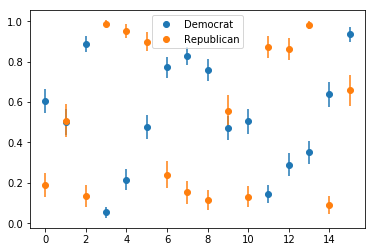

In [148]:
x = np.arange(len(dem.columns[1:]))
y = np.array(means)
yerr = np.array(margins)

r_x = np.arange(len(rep.columns))
r_y = np.array(r_means)
r_yerr = np.array(r_margins)
print(x.shape, y.shape, yerr.shape)
print(r_y.shape, r_yerr.shape)
fig, ax = plt.subplots()
ax_1 = plt.errorbar(x, y, yerr, fmt='o')
ax_2 = plt.errorbar(r_x, r_y, yerr=r_yerr, fmt='o')

ax.legend((ax_1[0], ax_2[0]), ('Democrat', 'Republican'))

End goal: VIsualize voting means and CIs for all bills, use loop or func to run em all. Bar plot side by side would be good

Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [127]:
adults = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(adults.shape)
adults.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [132]:
adults['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [131]:
adults['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [0]:
#adults['education'].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th'])

In [137]:
ct = pd.crosstab(adults['salary'], adults['occupation'], margins=True)
ct

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
salary,,,,,,,,,,,,,,,
<=50K,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277,23068
>50K,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320,7650
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


In [144]:
ct.iloc[:2, -1].values

array([23068,  7650])

In [152]:
row_sums = ct.iloc[:2, -1].values
col_sums = ct.iloc[-1, :-1].values
total = ct.loc['All', 'All']
print(row_sums)
print(col_sums)
print(total)

[23068  7650]
[3770    9 4099 4066  994 1370 2002 3295  149 4140  649 3650  928 1597]
30718


In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

In [154]:
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 14)
[[2.83112052e+03 6.75864314e+00 3.07818647e+03 3.05340478e+03
  7.46454587e+02 1.02881568e+03 1.50342262e+03 2.47441435e+03
  1.11893092e+02 3.10897584e+03 4.87373266e+02 2.74100527e+03
  6.96891204e+02 1.19928368e+03]
 [9.38879484e+02 2.24135686e+00 1.02081353e+03 1.01259522e+03
  2.47545413e+02 3.41184322e+02 4.98577381e+02 8.20585650e+02
  3.71069080e+01 1.03102416e+03 1.61626734e+02 9.08994726e+02
  2.31108796e+02 3.97716323e+02]]


In [155]:
observed = pd.crosstab(adults['salary'], adults['occupation']).values
print(observed.shape)
observed

(2, 14)


array([[3263,    8, 3170, 2098,  879, 1284, 1752, 3158,  148, 2281,  438,
        2667,  645, 1277],
       [ 507,    1,  929, 1968,  115,   86,  250,  137,    1, 1859,  211,
         983,  283,  320]])

In [156]:
chi_squared = ((observed-expected)**2/(expected)).sum()
print('Chi-squared: ', chi_squared)

Chi-squared:  3744.8987583977073


In [157]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print('Degrees of Freedom: ', dof)

Degrees of Freedom:  13


In [161]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print('Chi-Squared: ', chi_squared)
print('P-value: ', p_value)
print('Degrees of Freedom', dof)
print('Expected: \n', np.array(expected))

Chi-Squared:  3744.8987583977073
P-value:  0.0
Degrees of Freedom 13
Expected: 
 [[2.83112052e+03 6.75864314e+00 3.07818647e+03 3.05340478e+03
  7.46454587e+02 1.02881568e+03 1.50342262e+03 2.47441435e+03
  1.11893092e+02 3.10897584e+03 4.87373266e+02 2.74100527e+03
  6.96891204e+02 1.19928368e+03]
 [9.38879484e+02 2.24135686e+00 1.02081353e+03 1.01259522e+03
  2.47545413e+02 3.41184322e+02 4.98577381e+02 8.20585650e+02
  3.71069080e+01 1.03102416e+03 1.61626734e+02 9.08994726e+02
  2.31108796e+02 3.97716323e+02]]


Null Hypothesis: Salary is independent of occupation

Due to a p-value of 0, we REJECT the null hypothesis that salary is independent of occupation and conclude there is an association between salary and occupation

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)